[View in Colaboratory](https://colab.research.google.com/github/gumpy-hybridBCI/Faster-RCNN/blob/master/GAN.ipynb)

In [0]:

import os
import numpy as np
import matplotlib.pyplot as plt
try:
     import tqdm
except ImportError:
  !pip install tqdm
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# Let Keras know that we are using tensorflow as our backend engine
os.environ["KERAS_BACKEND"] = "tensorflow"
# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)
# The dimension of our random noise vector.
random_dim = 100

In [0]:
def load_minst_data():
    # load the data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1] 
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [0]:
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5) 

def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [0]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    # We initially set trainable to False since we only want to train either the 
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

11493376/11490434 [==============================] - 3s 0us/step


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  1%|          | 4/468 [00:00<00:14, 33.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 3 ---------------


  1%|          | 4/468 [00:00<00:12, 35.74it/s]

--------------- Epoch 4 ---------------


  1%|          | 4/468 [00:00<00:13, 35.50it/s]

--------------- Epoch 5 ---------------


  1%|          | 4/468 [00:00<00:13, 33.93it/s]

--------------- Epoch 6 ---------------


  1%|          | 4/468 [00:00<00:13, 35.09it/s]

--------------- Epoch 7 ---------------


  1%|          | 4/468 [00:00<00:13, 34.23it/s]

--------------- Epoch 8 ---------------


  1%|          | 4/468 [00:00<00:13, 34.49it/s]

--------------- Epoch 9 ---------------


  1%|          | 4/468 [00:00<00:13, 33.80it/s]

--------------- Epoch 10 ---------------


  1%|          | 4/468 [00:00<00:12, 35.88it/s]

--------------- Epoch 11 ---------------


  1%|          | 4/468 [00:00<00:13, 35.20it/s]

--------------- Epoch 12 ---------------


  1%|          | 4/468 [00:00<00:14, 32.81it/s]

--------------- Epoch 13 ---------------


  1%|          | 4/468 [00:00<00:13, 34.38it/s]

--------------- Epoch 14 ---------------


  1%|          | 4/468 [00:00<00:13, 34.65it/s]

--------------- Epoch 15 ---------------


  1%|          | 4/468 [00:00<00:13, 35.66it/s]

--------------- Epoch 16 ---------------


  1%|          | 4/468 [00:00<00:13, 34.29it/s]

--------------- Epoch 17 ---------------


  1%|          | 4/468 [00:00<00:12, 35.91it/s]

--------------- Epoch 18 ---------------


  1%|          | 4/468 [00:00<00:13, 35.18it/s]

--------------- Epoch 19 ---------------


  1%|          | 4/468 [00:00<00:13, 34.70it/s]

--------------- Epoch 20 ---------------


  1%|          | 4/468 [00:00<00:13, 33.83it/s]

--------------- Epoch 21 ---------------


  1%|          | 4/468 [00:00<00:13, 35.05it/s]

--------------- Epoch 22 ---------------


  1%|          | 4/468 [00:00<00:13, 33.80it/s]

--------------- Epoch 23 ---------------


  1%|          | 4/468 [00:00<00:13, 34.01it/s]

--------------- Epoch 24 ---------------


  1%|          | 4/468 [00:00<00:13, 35.04it/s]

--------------- Epoch 25 ---------------


  1%|          | 4/468 [00:00<00:13, 34.60it/s]

--------------- Epoch 26 ---------------


  1%|          | 4/468 [00:00<00:13, 34.96it/s]

--------------- Epoch 27 ---------------


  1%|          | 4/468 [00:00<00:12, 36.72it/s]

--------------- Epoch 28 ---------------


  1%|          | 4/468 [00:00<00:13, 35.04it/s]

--------------- Epoch 29 ---------------


  1%|          | 4/468 [00:00<00:14, 33.09it/s]

--------------- Epoch 30 ---------------


  1%|          | 4/468 [00:00<00:13, 34.41it/s]

--------------- Epoch 31 ---------------


  1%|          | 4/468 [00:00<00:14, 33.01it/s]

--------------- Epoch 32 ---------------


  1%|          | 4/468 [00:00<00:13, 35.06it/s]

--------------- Epoch 33 ---------------


  1%|          | 4/468 [00:00<00:12, 35.91it/s]

--------------- Epoch 34 ---------------


  1%|          | 4/468 [00:00<00:12, 35.84it/s]

--------------- Epoch 35 ---------------


  1%|          | 4/468 [00:00<00:12, 36.15it/s]

--------------- Epoch 36 ---------------


  1%|          | 4/468 [00:00<00:13, 34.93it/s]

--------------- Epoch 37 ---------------


  1%|          | 4/468 [00:00<00:13, 35.02it/s]

--------------- Epoch 38 ---------------


  1%|          | 4/468 [00:00<00:12, 35.79it/s]

--------------- Epoch 39 ---------------


  1%|          | 4/468 [00:00<00:13, 34.55it/s]

--------------- Epoch 40 ---------------


  1%|          | 4/468 [00:00<00:13, 33.79it/s]

--------------- Epoch 41 ---------------


  1%|          | 4/468 [00:00<00:13, 34.20it/s]

--------------- Epoch 42 ---------------


  1%|          | 4/468 [00:00<00:12, 37.43it/s]

--------------- Epoch 43 ---------------


  1%|          | 4/468 [00:00<00:14, 33.02it/s]

--------------- Epoch 44 ---------------


  1%|          | 4/468 [00:00<00:13, 35.21it/s]

--------------- Epoch 45 ---------------


  1%|          | 4/468 [00:00<00:12, 36.08it/s]

--------------- Epoch 46 ---------------


  1%|          | 4/468 [00:00<00:13, 34.95it/s]

--------------- Epoch 47 ---------------


  1%|          | 4/468 [00:00<00:13, 34.48it/s]

--------------- Epoch 48 ---------------


  1%|          | 4/468 [00:00<00:13, 34.15it/s]

--------------- Epoch 49 ---------------


  1%|          | 4/468 [00:00<00:13, 33.29it/s]

--------------- Epoch 50 ---------------


  1%|          | 4/468 [00:00<00:13, 34.22it/s]

--------------- Epoch 51 ---------------


  1%|          | 4/468 [00:00<00:13, 34.92it/s]

--------------- Epoch 52 ---------------


  1%|          | 4/468 [00:00<00:13, 33.65it/s]

--------------- Epoch 53 ---------------


  1%|          | 4/468 [00:00<00:13, 35.29it/s]

--------------- Epoch 54 ---------------


  1%|          | 4/468 [00:00<00:14, 32.55it/s]

--------------- Epoch 55 ---------------


  1%|          | 4/468 [00:00<00:12, 36.02it/s]

--------------- Epoch 56 ---------------


  1%|          | 4/468 [00:00<00:12, 36.41it/s]

--------------- Epoch 57 ---------------


  1%|          | 4/468 [00:00<00:14, 32.53it/s]

--------------- Epoch 58 ---------------


  1%|          | 4/468 [00:00<00:13, 34.13it/s]

--------------- Epoch 59 ---------------


  1%|          | 4/468 [00:00<00:13, 33.85it/s]

--------------- Epoch 60 ---------------


  1%|          | 4/468 [00:00<00:14, 33.06it/s]

--------------- Epoch 61 ---------------


  1%|          | 4/468 [00:00<00:12, 36.22it/s]

--------------- Epoch 62 ---------------


  1%|          | 4/468 [00:00<00:13, 34.95it/s]

--------------- Epoch 63 ---------------


  1%|          | 4/468 [00:00<00:13, 33.79it/s]

--------------- Epoch 64 ---------------


  1%|          | 4/468 [00:00<00:12, 36.02it/s]

--------------- Epoch 65 ---------------


  1%|          | 4/468 [00:00<00:13, 33.96it/s]

--------------- Epoch 66 ---------------


  1%|          | 4/468 [00:00<00:12, 35.80it/s]

--------------- Epoch 67 ---------------


  1%|          | 4/468 [00:00<00:13, 33.15it/s]

--------------- Epoch 68 ---------------


  1%|          | 4/468 [00:00<00:13, 34.72it/s]

--------------- Epoch 69 ---------------


  1%|          | 4/468 [00:00<00:12, 35.75it/s]

--------------- Epoch 70 ---------------


  1%|          | 4/468 [00:00<00:13, 33.93it/s]

--------------- Epoch 71 ---------------


  1%|          | 4/468 [00:00<00:14, 32.50it/s]

--------------- Epoch 72 ---------------


  1%|          | 4/468 [00:00<00:13, 35.65it/s]

--------------- Epoch 73 ---------------


  1%|          | 4/468 [00:00<00:13, 34.61it/s]

--------------- Epoch 74 ---------------


  1%|          | 4/468 [00:00<00:13, 33.67it/s]

--------------- Epoch 75 ---------------


  1%|          | 4/468 [00:00<00:13, 34.56it/s]

--------------- Epoch 76 ---------------


  1%|          | 4/468 [00:00<00:14, 32.24it/s]

--------------- Epoch 77 ---------------


  1%|          | 4/468 [00:00<00:13, 33.93it/s]

--------------- Epoch 78 ---------------


  1%|          | 4/468 [00:00<00:13, 35.11it/s]

--------------- Epoch 79 ---------------


  1%|          | 4/468 [00:00<00:13, 35.57it/s]

--------------- Epoch 80 ---------------


  1%|          | 4/468 [00:00<00:14, 33.10it/s]

--------------- Epoch 81 ---------------


  1%|          | 4/468 [00:00<00:13, 34.53it/s]

--------------- Epoch 82 ---------------


  1%|          | 4/468 [00:00<00:13, 33.55it/s]

--------------- Epoch 83 ---------------


  1%|          | 4/468 [00:00<00:13, 34.95it/s]

--------------- Epoch 84 ---------------


  1%|          | 4/468 [00:00<00:12, 36.54it/s]

--------------- Epoch 85 ---------------


  1%|          | 4/468 [00:00<00:12, 35.99it/s]

--------------- Epoch 86 ---------------


  1%|          | 4/468 [00:00<00:13, 33.86it/s]

--------------- Epoch 87 ---------------


  1%|          | 4/468 [00:00<00:14, 32.41it/s]

--------------- Epoch 88 ---------------


  1%|          | 4/468 [00:00<00:12, 35.78it/s]

--------------- Epoch 89 ---------------


  1%|          | 4/468 [00:00<00:13, 34.12it/s]

--------------- Epoch 90 ---------------


  1%|          | 4/468 [00:00<00:13, 34.05it/s]

--------------- Epoch 91 ---------------


  1%|          | 4/468 [00:00<00:14, 32.90it/s]

--------------- Epoch 92 ---------------


  1%|          | 4/468 [00:00<00:13, 34.75it/s]

--------------- Epoch 93 ---------------


  1%|          | 4/468 [00:00<00:12, 36.01it/s]

--------------- Epoch 94 ---------------


  1%|          | 4/468 [00:00<00:13, 33.26it/s]

--------------- Epoch 95 ---------------


  1%|          | 4/468 [00:00<00:13, 34.52it/s]

--------------- Epoch 96 ---------------


  1%|          | 4/468 [00:00<00:13, 34.52it/s]

--------------- Epoch 97 ---------------


  1%|          | 4/468 [00:00<00:12, 35.87it/s]

--------------- Epoch 98 ---------------


  1%|          | 4/468 [00:00<00:13, 34.37it/s]

--------------- Epoch 99 ---------------


  1%|          | 4/468 [00:00<00:13, 34.42it/s]

--------------- Epoch 100 ---------------


  1%|          | 4/468 [00:00<00:13, 33.16it/s]

--------------- Epoch 101 ---------------


  1%|          | 4/468 [00:00<00:13, 34.94it/s]

--------------- Epoch 102 ---------------


  1%|          | 4/468 [00:00<00:14, 32.91it/s]

--------------- Epoch 103 ---------------


  1%|          | 4/468 [00:00<00:13, 35.34it/s]

--------------- Epoch 104 ---------------


  1%|          | 4/468 [00:00<00:13, 33.48it/s]

--------------- Epoch 105 ---------------


  1%|          | 4/468 [00:00<00:13, 34.22it/s]

--------------- Epoch 106 ---------------


  1%|          | 4/468 [00:00<00:13, 34.31it/s]

--------------- Epoch 107 ---------------


  1%|          | 4/468 [00:00<00:13, 34.22it/s]

--------------- Epoch 108 ---------------


  1%|          | 4/468 [00:00<00:13, 34.23it/s]

--------------- Epoch 109 ---------------


  1%|          | 4/468 [00:00<00:13, 33.78it/s]

--------------- Epoch 110 ---------------


  1%|          | 4/468 [00:00<00:13, 34.20it/s]

--------------- Epoch 111 ---------------


  1%|          | 4/468 [00:00<00:13, 34.13it/s]

--------------- Epoch 112 ---------------


  1%|          | 4/468 [00:00<00:12, 35.83it/s]

--------------- Epoch 113 ---------------


  1%|          | 4/468 [00:00<00:12, 36.32it/s]

--------------- Epoch 114 ---------------


  1%|          | 4/468 [00:00<00:13, 34.33it/s]

--------------- Epoch 115 ---------------


  1%|          | 4/468 [00:00<00:13, 35.05it/s]

--------------- Epoch 116 ---------------


  1%|          | 4/468 [00:00<00:13, 34.21it/s]

--------------- Epoch 117 ---------------


  1%|          | 4/468 [00:00<00:13, 34.33it/s]

--------------- Epoch 118 ---------------


  1%|          | 4/468 [00:00<00:13, 33.52it/s]

--------------- Epoch 119 ---------------


  1%|          | 4/468 [00:00<00:13, 34.42it/s]

--------------- Epoch 120 ---------------


  1%|          | 4/468 [00:00<00:13, 34.35it/s]

--------------- Epoch 121 ---------------


  1%|          | 4/468 [00:00<00:13, 33.64it/s]

--------------- Epoch 122 ---------------


  1%|          | 4/468 [00:00<00:13, 34.41it/s]

--------------- Epoch 123 ---------------


  1%|          | 4/468 [00:00<00:13, 35.34it/s]

--------------- Epoch 124 ---------------


  1%|          | 4/468 [00:00<00:13, 35.15it/s]

--------------- Epoch 125 ---------------


  1%|          | 4/468 [00:00<00:13, 33.20it/s]

--------------- Epoch 126 ---------------


  1%|          | 4/468 [00:00<00:13, 34.46it/s]

--------------- Epoch 127 ---------------


  1%|          | 4/468 [00:00<00:13, 35.41it/s]

--------------- Epoch 128 ---------------


  1%|          | 4/468 [00:00<00:13, 34.34it/s]

--------------- Epoch 129 ---------------


  1%|          | 4/468 [00:00<00:13, 34.41it/s]

--------------- Epoch 130 ---------------


  1%|          | 4/468 [00:00<00:12, 35.97it/s]

--------------- Epoch 131 ---------------


  1%|          | 4/468 [00:00<00:13, 34.43it/s]

--------------- Epoch 132 ---------------


  1%|          | 4/468 [00:00<00:12, 36.47it/s]

--------------- Epoch 133 ---------------


  1%|          | 4/468 [00:00<00:13, 34.03it/s]

--------------- Epoch 134 ---------------


  1%|          | 4/468 [00:00<00:13, 34.09it/s]

--------------- Epoch 135 ---------------


  1%|          | 4/468 [00:00<00:13, 35.47it/s]

--------------- Epoch 136 ---------------


  1%|          | 4/468 [00:00<00:13, 35.46it/s]

--------------- Epoch 137 ---------------


  1%|          | 4/468 [00:00<00:13, 34.35it/s]

--------------- Epoch 138 ---------------


  1%|          | 4/468 [00:00<00:13, 35.51it/s]

--------------- Epoch 139 ---------------


  1%|          | 4/468 [00:00<00:14, 31.81it/s]

--------------- Epoch 140 ---------------


  1%|          | 4/468 [00:00<00:13, 33.89it/s]

--------------- Epoch 141 ---------------


  1%|          | 4/468 [00:00<00:13, 33.24it/s]

--------------- Epoch 142 ---------------


  1%|          | 4/468 [00:00<00:13, 33.61it/s]

--------------- Epoch 143 ---------------


  1%|          | 4/468 [00:00<00:13, 34.68it/s]

--------------- Epoch 144 ---------------


  1%|          | 4/468 [00:00<00:13, 34.43it/s]

--------------- Epoch 145 ---------------


  1%|          | 4/468 [00:00<00:13, 34.62it/s]

--------------- Epoch 146 ---------------


  1%|          | 4/468 [00:00<00:13, 34.44it/s]

--------------- Epoch 147 ---------------


  1%|          | 4/468 [00:00<00:13, 35.20it/s]

--------------- Epoch 148 ---------------


  1%|          | 4/468 [00:00<00:14, 33.05it/s]

--------------- Epoch 149 ---------------


  1%|          | 4/468 [00:00<00:13, 34.57it/s]

--------------- Epoch 150 ---------------


  1%|          | 4/468 [00:00<00:13, 34.31it/s]

--------------- Epoch 151 ---------------


  1%|          | 4/468 [00:00<00:12, 35.75it/s]

--------------- Epoch 152 ---------------


  1%|          | 4/468 [00:00<00:14, 32.36it/s]

--------------- Epoch 153 ---------------


  1%|          | 4/468 [00:00<00:13, 35.20it/s]

--------------- Epoch 154 ---------------


  1%|          | 4/468 [00:00<00:12, 36.56it/s]

--------------- Epoch 155 ---------------


  1%|          | 4/468 [00:00<00:13, 35.36it/s]

--------------- Epoch 156 ---------------


  1%|          | 4/468 [00:00<00:13, 33.84it/s]

--------------- Epoch 157 ---------------


  1%|          | 4/468 [00:00<00:13, 34.96it/s]

--------------- Epoch 158 ---------------


  1%|          | 4/468 [00:00<00:13, 34.78it/s]

--------------- Epoch 159 ---------------


  1%|          | 4/468 [00:00<00:13, 34.44it/s]

--------------- Epoch 160 ---------------


  1%|          | 4/468 [00:00<00:14, 32.41it/s]

--------------- Epoch 161 ---------------


  1%|          | 4/468 [00:00<00:13, 34.47it/s]

--------------- Epoch 162 ---------------


  1%|          | 4/468 [00:00<00:12, 35.80it/s]

--------------- Epoch 163 ---------------


  1%|          | 4/468 [00:00<00:13, 35.62it/s]

--------------- Epoch 164 ---------------


  1%|          | 4/468 [00:00<00:13, 35.67it/s]

--------------- Epoch 165 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 166 ---------------


  1%|          | 4/468 [00:00<00:12, 36.54it/s]

--------------- Epoch 167 ---------------


  1%|          | 4/468 [00:00<00:13, 33.48it/s]

--------------- Epoch 168 ---------------


  1%|          | 4/468 [00:00<00:13, 34.40it/s]

--------------- Epoch 169 ---------------


  1%|          | 4/468 [00:00<00:13, 33.76it/s]

--------------- Epoch 170 ---------------


  1%|          | 4/468 [00:00<00:12, 36.62it/s]

--------------- Epoch 171 ---------------


  1%|          | 4/468 [00:00<00:13, 33.54it/s]

--------------- Epoch 172 ---------------


  1%|          | 4/468 [00:00<00:13, 34.88it/s]

--------------- Epoch 173 ---------------


  1%|          | 4/468 [00:00<00:14, 32.67it/s]

--------------- Epoch 174 ---------------


  1%|          | 4/468 [00:00<00:13, 34.42it/s]

--------------- Epoch 175 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 176 ---------------


  1%|          | 4/468 [00:00<00:13, 34.38it/s]

--------------- Epoch 177 ---------------


  1%|          | 4/468 [00:00<00:13, 34.35it/s]

--------------- Epoch 178 ---------------


  1%|          | 4/468 [00:00<00:13, 34.61it/s]

--------------- Epoch 179 ---------------


  1%|          | 4/468 [00:00<00:13, 35.55it/s]

--------------- Epoch 180 ---------------


  1%|          | 4/468 [00:00<00:13, 33.62it/s]

--------------- Epoch 181 ---------------


  1%|          | 4/468 [00:00<00:13, 34.96it/s]

--------------- Epoch 182 ---------------


  1%|          | 4/468 [00:00<00:13, 34.46it/s]

--------------- Epoch 183 ---------------


  1%|          | 4/468 [00:00<00:13, 34.63it/s]

--------------- Epoch 184 ---------------


  1%|          | 4/468 [00:00<00:13, 34.76it/s]

--------------- Epoch 185 ---------------


  1%|          | 4/468 [00:00<00:13, 35.07it/s]

--------------- Epoch 186 ---------------


  1%|          | 4/468 [00:00<00:13, 33.71it/s]

--------------- Epoch 187 ---------------


  1%|          | 4/468 [00:00<00:13, 33.68it/s]

--------------- Epoch 188 ---------------


  1%|          | 4/468 [00:00<00:12, 36.21it/s]

--------------- Epoch 189 ---------------


  1%|          | 4/468 [00:00<00:13, 33.31it/s]

--------------- Epoch 190 ---------------


  1%|          | 4/468 [00:00<00:13, 34.19it/s]

--------------- Epoch 191 ---------------


  1%|          | 4/468 [00:00<00:13, 33.63it/s]

--------------- Epoch 192 ---------------


  1%|          | 4/468 [00:00<00:14, 32.50it/s]

--------------- Epoch 193 ---------------


  1%|          | 4/468 [00:00<00:13, 34.19it/s]

--------------- Epoch 194 ---------------


  1%|          | 4/468 [00:00<00:13, 35.07it/s]

--------------- Epoch 195 ---------------


  1%|          | 4/468 [00:00<00:13, 35.56it/s]

--------------- Epoch 196 ---------------


  1%|          | 4/468 [00:00<00:13, 35.51it/s]

--------------- Epoch 197 ---------------


  1%|          | 4/468 [00:00<00:13, 34.71it/s]

--------------- Epoch 198 ---------------


  1%|          | 4/468 [00:00<00:13, 34.86it/s]

--------------- Epoch 199 ---------------


  1%|          | 4/468 [00:00<00:13, 33.37it/s]

--------------- Epoch 200 ---------------


  1%|          | 4/468 [00:00<00:14, 33.05it/s]

--------------- Epoch 201 ---------------


  1%|          | 4/468 [00:00<00:13, 34.21it/s]

--------------- Epoch 202 ---------------


  1%|          | 4/468 [00:00<00:13, 33.33it/s]

--------------- Epoch 203 ---------------


  1%|          | 4/468 [00:00<00:13, 34.14it/s]

--------------- Epoch 204 ---------------


  1%|          | 4/468 [00:00<00:13, 35.66it/s]

--------------- Epoch 205 ---------------


  1%|          | 4/468 [00:00<00:13, 34.93it/s]

--------------- Epoch 206 ---------------


  1%|          | 4/468 [00:00<00:13, 34.26it/s]

--------------- Epoch 207 ---------------


  1%|          | 4/468 [00:00<00:13, 33.91it/s]

--------------- Epoch 208 ---------------


  1%|          | 4/468 [00:00<00:13, 33.31it/s]

--------------- Epoch 209 ---------------


  1%|          | 4/468 [00:00<00:13, 34.02it/s]

--------------- Epoch 210 ---------------


  1%|          | 4/468 [00:00<00:13, 35.06it/s]

--------------- Epoch 211 ---------------


  1%|          | 4/468 [00:00<00:13, 35.62it/s]

--------------- Epoch 212 ---------------


  1%|          | 4/468 [00:00<00:12, 35.88it/s]

--------------- Epoch 213 ---------------


  1%|          | 4/468 [00:00<00:13, 35.59it/s]

--------------- Epoch 214 ---------------


  1%|          | 4/468 [00:00<00:13, 35.12it/s]

--------------- Epoch 215 ---------------


  1%|          | 4/468 [00:00<00:12, 35.88it/s]

--------------- Epoch 216 ---------------


  1%|          | 4/468 [00:00<00:13, 35.10it/s]

--------------- Epoch 217 ---------------


  1%|          | 4/468 [00:00<00:13, 34.30it/s]

--------------- Epoch 218 ---------------


  1%|          | 4/468 [00:00<00:13, 34.33it/s]

--------------- Epoch 219 ---------------


  1%|          | 4/468 [00:00<00:14, 32.30it/s]

--------------- Epoch 220 ---------------


  1%|          | 4/468 [00:00<00:13, 33.56it/s]

--------------- Epoch 221 ---------------


  1%|          | 4/468 [00:00<00:13, 35.49it/s]

--------------- Epoch 222 ---------------


  1%|          | 4/468 [00:00<00:13, 35.17it/s]

--------------- Epoch 223 ---------------


  1%|          | 4/468 [00:00<00:13, 33.77it/s]

--------------- Epoch 224 ---------------


  1%|          | 4/468 [00:00<00:13, 33.84it/s]

--------------- Epoch 225 ---------------


  1%|          | 4/468 [00:00<00:13, 33.27it/s]

--------------- Epoch 226 ---------------


  1%|          | 4/468 [00:00<00:13, 33.65it/s]

--------------- Epoch 227 ---------------


  1%|          | 4/468 [00:00<00:13, 34.45it/s]

--------------- Epoch 228 ---------------


  1%|          | 4/468 [00:00<00:13, 33.82it/s]

--------------- Epoch 229 ---------------


  1%|          | 4/468 [00:00<00:13, 34.74it/s]

--------------- Epoch 230 ---------------


  1%|          | 4/468 [00:00<00:13, 34.07it/s]

--------------- Epoch 231 ---------------


  1%|          | 4/468 [00:00<00:13, 33.70it/s]

--------------- Epoch 232 ---------------


  1%|          | 4/468 [00:00<00:13, 33.67it/s]

--------------- Epoch 233 ---------------


  1%|          | 4/468 [00:00<00:12, 36.38it/s]

--------------- Epoch 234 ---------------


  1%|          | 4/468 [00:00<00:13, 33.73it/s]

--------------- Epoch 235 ---------------


  1%|          | 4/468 [00:00<00:13, 34.16it/s]

--------------- Epoch 236 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 237 ---------------


  1%|          | 4/468 [00:00<00:12, 36.89it/s]

--------------- Epoch 238 ---------------


  1%|          | 4/468 [00:00<00:13, 33.94it/s]

--------------- Epoch 239 ---------------


  1%|          | 4/468 [00:00<00:13, 34.54it/s]

--------------- Epoch 240 ---------------


  1%|          | 4/468 [00:00<00:13, 34.63it/s]

--------------- Epoch 241 ---------------


  1%|          | 4/468 [00:00<00:13, 35.40it/s]

--------------- Epoch 242 ---------------


  1%|          | 4/468 [00:00<00:13, 33.22it/s]

--------------- Epoch 243 ---------------


  1%|          | 4/468 [00:00<00:14, 32.38it/s]

--------------- Epoch 244 ---------------


  1%|          | 4/468 [00:00<00:13, 34.87it/s]

--------------- Epoch 245 ---------------


  1%|          | 4/468 [00:00<00:12, 36.26it/s]

--------------- Epoch 246 ---------------


  1%|          | 4/468 [00:00<00:14, 33.07it/s]

--------------- Epoch 247 ---------------


  1%|          | 4/468 [00:00<00:13, 34.90it/s]

--------------- Epoch 248 ---------------


  1%|          | 4/468 [00:00<00:13, 35.20it/s]

--------------- Epoch 249 ---------------


  1%|          | 4/468 [00:00<00:13, 33.33it/s]

--------------- Epoch 250 ---------------


  1%|          | 4/468 [00:00<00:13, 34.86it/s]

--------------- Epoch 251 ---------------


  1%|          | 4/468 [00:00<00:13, 34.17it/s]

--------------- Epoch 252 ---------------


  1%|          | 4/468 [00:00<00:13, 33.18it/s]

--------------- Epoch 253 ---------------


  1%|          | 4/468 [00:00<00:14, 31.67it/s]

--------------- Epoch 254 ---------------


  1%|          | 4/468 [00:00<00:13, 34.42it/s]

--------------- Epoch 255 ---------------


  1%|          | 4/468 [00:00<00:13, 34.80it/s]

--------------- Epoch 256 ---------------


  1%|          | 4/468 [00:00<00:13, 34.75it/s]

--------------- Epoch 257 ---------------


  1%|          | 4/468 [00:00<00:12, 35.93it/s]

--------------- Epoch 258 ---------------


  1%|          | 4/468 [00:00<00:13, 35.46it/s]

--------------- Epoch 259 ---------------


  1%|          | 4/468 [00:00<00:13, 35.47it/s]

--------------- Epoch 260 ---------------


  1%|          | 4/468 [00:00<00:13, 35.21it/s]

--------------- Epoch 261 ---------------


  1%|          | 4/468 [00:00<00:13, 35.31it/s]

--------------- Epoch 262 ---------------


  1%|          | 4/468 [00:00<00:12, 36.10it/s]

--------------- Epoch 263 ---------------


  1%|          | 4/468 [00:00<00:12, 35.86it/s]

--------------- Epoch 264 ---------------


  1%|          | 4/468 [00:00<00:13, 34.41it/s]

--------------- Epoch 265 ---------------


  1%|          | 4/468 [00:00<00:13, 33.50it/s]

--------------- Epoch 266 ---------------


  1%|          | 4/468 [00:00<00:13, 33.48it/s]

--------------- Epoch 267 ---------------


  1%|          | 4/468 [00:00<00:13, 35.60it/s]

--------------- Epoch 268 ---------------


  1%|          | 4/468 [00:00<00:13, 34.34it/s]

--------------- Epoch 269 ---------------


  1%|          | 4/468 [00:00<00:13, 33.92it/s]

--------------- Epoch 270 ---------------


  1%|          | 4/468 [00:00<00:13, 35.34it/s]

--------------- Epoch 271 ---------------


  1%|          | 4/468 [00:00<00:13, 34.75it/s]

--------------- Epoch 272 ---------------


  1%|          | 4/468 [00:00<00:13, 34.70it/s]

--------------- Epoch 273 ---------------


  1%|          | 4/468 [00:00<00:13, 34.11it/s]

--------------- Epoch 274 ---------------


  1%|          | 4/468 [00:00<00:13, 33.28it/s]

--------------- Epoch 275 ---------------


  1%|          | 4/468 [00:00<00:13, 35.21it/s]

--------------- Epoch 276 ---------------


  1%|          | 4/468 [00:00<00:13, 34.10it/s]

--------------- Epoch 277 ---------------


  1%|          | 4/468 [00:00<00:12, 36.31it/s]

--------------- Epoch 278 ---------------


  1%|          | 4/468 [00:00<00:13, 34.56it/s]

--------------- Epoch 279 ---------------


  1%|          | 4/468 [00:00<00:14, 32.12it/s]

--------------- Epoch 280 ---------------


  1%|          | 4/468 [00:00<00:13, 34.11it/s]

--------------- Epoch 281 ---------------


  1%|          | 4/468 [00:00<00:13, 34.44it/s]

--------------- Epoch 282 ---------------


  1%|          | 4/468 [00:00<00:13, 33.93it/s]

--------------- Epoch 283 ---------------


  1%|          | 4/468 [00:00<00:13, 33.74it/s]

--------------- Epoch 284 ---------------


  1%|          | 4/468 [00:00<00:12, 35.86it/s]

--------------- Epoch 285 ---------------


  1%|          | 4/468 [00:00<00:13, 34.99it/s]

--------------- Epoch 286 ---------------


  1%|          | 4/468 [00:00<00:13, 33.63it/s]

--------------- Epoch 287 ---------------


  1%|          | 4/468 [00:00<00:12, 35.74it/s]

--------------- Epoch 288 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 289 ---------------


  1%|          | 4/468 [00:00<00:13, 34.53it/s]

--------------- Epoch 290 ---------------


  1%|          | 4/468 [00:00<00:14, 32.77it/s]

--------------- Epoch 291 ---------------


  1%|          | 4/468 [00:00<00:13, 34.09it/s]

--------------- Epoch 292 ---------------


  1%|          | 4/468 [00:00<00:13, 34.92it/s]

--------------- Epoch 293 ---------------


  1%|          | 4/468 [00:00<00:13, 34.65it/s]

--------------- Epoch 294 ---------------


  1%|          | 4/468 [00:00<00:13, 35.01it/s]

--------------- Epoch 295 ---------------


  1%|          | 4/468 [00:00<00:13, 33.45it/s]

--------------- Epoch 296 ---------------


  1%|          | 4/468 [00:00<00:12, 35.91it/s]

--------------- Epoch 297 ---------------


  1%|          | 4/468 [00:00<00:13, 33.98it/s]

--------------- Epoch 298 ---------------


  1%|          | 4/468 [00:00<00:13, 33.46it/s]

--------------- Epoch 299 ---------------


  1%|          | 4/468 [00:00<00:12, 36.05it/s]

--------------- Epoch 300 ---------------


  1%|          | 4/468 [00:00<00:13, 33.84it/s]

--------------- Epoch 301 ---------------


  1%|          | 4/468 [00:00<00:13, 33.29it/s]

--------------- Epoch 302 ---------------


  1%|          | 4/468 [00:00<00:13, 35.65it/s]

--------------- Epoch 303 ---------------


  1%|          | 4/468 [00:00<00:14, 33.10it/s]

--------------- Epoch 304 ---------------


  1%|          | 4/468 [00:00<00:13, 33.79it/s]

--------------- Epoch 305 ---------------


  1%|          | 4/468 [00:00<00:13, 33.42it/s]

--------------- Epoch 306 ---------------


  1%|          | 4/468 [00:00<00:13, 33.94it/s]

--------------- Epoch 307 ---------------


  1%|          | 4/468 [00:00<00:14, 32.71it/s]

--------------- Epoch 308 ---------------


  1%|          | 4/468 [00:00<00:12, 35.85it/s]

--------------- Epoch 309 ---------------


  1%|          | 4/468 [00:00<00:12, 36.12it/s]

--------------- Epoch 310 ---------------


  1%|          | 4/468 [00:00<00:13, 34.76it/s]

--------------- Epoch 311 ---------------


  1%|          | 4/468 [00:00<00:13, 35.33it/s]

--------------- Epoch 312 ---------------


  1%|          | 4/468 [00:00<00:13, 34.70it/s]

--------------- Epoch 313 ---------------


  1%|          | 4/468 [00:00<00:13, 35.23it/s]

--------------- Epoch 314 ---------------


  1%|          | 4/468 [00:00<00:12, 36.13it/s]

--------------- Epoch 315 ---------------


  1%|          | 4/468 [00:00<00:13, 35.14it/s]

--------------- Epoch 316 ---------------


  1%|          | 4/468 [00:00<00:13, 34.40it/s]

--------------- Epoch 317 ---------------


  1%|          | 4/468 [00:00<00:13, 34.49it/s]

--------------- Epoch 318 ---------------


  1%|          | 4/468 [00:00<00:13, 34.94it/s]

--------------- Epoch 319 ---------------


  1%|          | 4/468 [00:00<00:13, 33.62it/s]

--------------- Epoch 320 ---------------


  1%|          | 4/468 [00:00<00:14, 32.48it/s]

--------------- Epoch 321 ---------------


  1%|          | 4/468 [00:00<00:12, 35.95it/s]

--------------- Epoch 322 ---------------


  1%|          | 4/468 [00:00<00:13, 34.71it/s]

--------------- Epoch 323 ---------------


  1%|          | 4/468 [00:00<00:13, 34.85it/s]

--------------- Epoch 324 ---------------


  1%|          | 4/468 [00:00<00:14, 33.11it/s]

--------------- Epoch 325 ---------------


  1%|          | 4/468 [00:00<00:14, 33.12it/s]

--------------- Epoch 326 ---------------


  1%|          | 4/468 [00:00<00:13, 33.78it/s]

--------------- Epoch 327 ---------------


  1%|          | 4/468 [00:00<00:13, 34.31it/s]

--------------- Epoch 328 ---------------


  1%|          | 4/468 [00:00<00:13, 34.57it/s]

--------------- Epoch 329 ---------------


  1%|          | 4/468 [00:00<00:13, 35.43it/s]

--------------- Epoch 330 ---------------


  1%|          | 4/468 [00:00<00:13, 34.21it/s]

--------------- Epoch 331 ---------------


  1%|          | 4/468 [00:00<00:13, 33.41it/s]

--------------- Epoch 332 ---------------


  1%|          | 4/468 [00:00<00:12, 35.79it/s]

--------------- Epoch 333 ---------------


  1%|          | 4/468 [00:00<00:13, 33.74it/s]

--------------- Epoch 334 ---------------


  1%|          | 4/468 [00:00<00:13, 34.74it/s]

--------------- Epoch 335 ---------------


  1%|          | 4/468 [00:00<00:14, 32.65it/s]

--------------- Epoch 336 ---------------


  1%|          | 4/468 [00:00<00:13, 34.78it/s]

--------------- Epoch 337 ---------------


  1%|          | 4/468 [00:00<00:13, 34.32it/s]

--------------- Epoch 338 ---------------


  1%|          | 4/468 [00:00<00:13, 33.79it/s]

--------------- Epoch 339 ---------------


  1%|          | 4/468 [00:00<00:13, 34.04it/s]

--------------- Epoch 340 ---------------


  1%|          | 4/468 [00:00<00:14, 32.72it/s]

--------------- Epoch 341 ---------------


  1%|          | 4/468 [00:00<00:13, 35.35it/s]

--------------- Epoch 342 ---------------


  1%|          | 4/468 [00:00<00:13, 34.63it/s]

--------------- Epoch 343 ---------------


  1%|          | 4/468 [00:00<00:13, 34.02it/s]

--------------- Epoch 344 ---------------


  1%|          | 4/468 [00:00<00:13, 35.02it/s]

--------------- Epoch 345 ---------------


  1%|          | 4/468 [00:00<00:13, 34.53it/s]

--------------- Epoch 346 ---------------


  1%|          | 4/468 [00:00<00:13, 35.47it/s]

--------------- Epoch 347 ---------------


  1%|          | 4/468 [00:00<00:13, 35.65it/s]

--------------- Epoch 348 ---------------


  1%|          | 4/468 [00:00<00:13, 34.09it/s]

--------------- Epoch 349 ---------------


  1%|          | 4/468 [00:00<00:13, 33.80it/s]

--------------- Epoch 350 ---------------


  1%|          | 4/468 [00:00<00:12, 36.11it/s]

--------------- Epoch 351 ---------------


  1%|          | 4/468 [00:00<00:13, 35.45it/s]

--------------- Epoch 352 ---------------


  1%|          | 4/468 [00:00<00:13, 33.55it/s]

--------------- Epoch 353 ---------------


  1%|          | 4/468 [00:00<00:13, 35.49it/s]

--------------- Epoch 354 ---------------


  1%|          | 4/468 [00:00<00:13, 34.70it/s]

--------------- Epoch 355 ---------------


  1%|          | 4/468 [00:00<00:13, 33.54it/s]

--------------- Epoch 356 ---------------


  1%|          | 4/468 [00:00<00:13, 34.62it/s]

--------------- Epoch 357 ---------------


  1%|          | 4/468 [00:00<00:13, 33.27it/s]

--------------- Epoch 358 ---------------


  1%|          | 4/468 [00:00<00:14, 32.45it/s]

--------------- Epoch 359 ---------------


  1%|          | 4/468 [00:00<00:13, 34.28it/s]

--------------- Epoch 360 ---------------


  1%|          | 3/468 [00:00<00:15, 29.40it/s]

--------------- Epoch 361 ---------------


  1%|          | 4/468 [00:00<00:13, 34.77it/s]

--------------- Epoch 362 ---------------


  1%|          | 4/468 [00:00<00:13, 34.36it/s]

--------------- Epoch 363 ---------------


  1%|          | 4/468 [00:00<00:13, 33.50it/s]

--------------- Epoch 364 ---------------


  1%|          | 4/468 [00:00<00:14, 32.55it/s]

--------------- Epoch 365 ---------------


  1%|          | 4/468 [00:00<00:13, 34.33it/s]

--------------- Epoch 366 ---------------


  1%|          | 4/468 [00:00<00:13, 34.56it/s]

--------------- Epoch 367 ---------------


  1%|          | 4/468 [00:00<00:13, 33.36it/s]

--------------- Epoch 368 ---------------


  1%|          | 4/468 [00:00<00:13, 34.05it/s]

--------------- Epoch 369 ---------------


  1%|          | 4/468 [00:00<00:13, 34.20it/s]

--------------- Epoch 370 ---------------


  1%|          | 4/468 [00:00<00:13, 34.30it/s]

--------------- Epoch 371 ---------------


  1%|          | 4/468 [00:00<00:13, 35.38it/s]

--------------- Epoch 372 ---------------


  1%|          | 4/468 [00:00<00:13, 35.14it/s]

--------------- Epoch 373 ---------------


  1%|          | 4/468 [00:00<00:13, 34.25it/s]

--------------- Epoch 374 ---------------


  1%|          | 4/468 [00:00<00:14, 33.11it/s]

--------------- Epoch 375 ---------------


  1%|          | 4/468 [00:00<00:13, 34.70it/s]

--------------- Epoch 376 ---------------


  1%|          | 4/468 [00:00<00:14, 32.98it/s]

--------------- Epoch 377 ---------------


  1%|          | 4/468 [00:00<00:12, 35.88it/s]

--------------- Epoch 378 ---------------


  1%|          | 4/468 [00:00<00:12, 36.28it/s]

--------------- Epoch 379 ---------------


  1%|          | 4/468 [00:00<00:13, 34.04it/s]

--------------- Epoch 380 ---------------


  1%|          | 4/468 [00:00<00:13, 33.56it/s]

--------------- Epoch 381 ---------------


  1%|          | 4/468 [00:00<00:13, 33.72it/s]

--------------- Epoch 382 ---------------


  1%|          | 4/468 [00:00<00:13, 35.36it/s]

--------------- Epoch 383 ---------------


  1%|          | 4/468 [00:00<00:13, 34.16it/s]

--------------- Epoch 384 ---------------


  1%|          | 4/468 [00:00<00:13, 35.31it/s]

--------------- Epoch 385 ---------------


  1%|          | 4/468 [00:00<00:13, 34.36it/s]

--------------- Epoch 386 ---------------


  1%|          | 4/468 [00:00<00:13, 34.96it/s]

--------------- Epoch 387 ---------------


  1%|          | 4/468 [00:00<00:13, 34.62it/s]

--------------- Epoch 388 ---------------


  1%|          | 4/468 [00:00<00:14, 32.78it/s]

--------------- Epoch 389 ---------------


  1%|          | 4/468 [00:00<00:13, 34.69it/s]

--------------- Epoch 390 ---------------


  1%|          | 4/468 [00:00<00:13, 34.73it/s]

--------------- Epoch 391 ---------------


  1%|          | 4/468 [00:00<00:12, 35.77it/s]

--------------- Epoch 392 ---------------


  1%|          | 4/468 [00:00<00:13, 34.91it/s]

--------------- Epoch 393 ---------------


  1%|          | 4/468 [00:00<00:13, 34.19it/s]

--------------- Epoch 394 ---------------


  1%|          | 4/468 [00:00<00:13, 35.61it/s]

--------------- Epoch 395 ---------------


  1%|          | 4/468 [00:00<00:13, 33.94it/s]

--------------- Epoch 396 ---------------


  1%|          | 4/468 [00:00<00:13, 34.19it/s]

--------------- Epoch 397 ---------------


  1%|          | 4/468 [00:00<00:13, 33.97it/s]

--------------- Epoch 398 ---------------


  1%|          | 4/468 [00:00<00:14, 33.08it/s]

--------------- Epoch 399 ---------------


  1%|          | 4/468 [00:00<00:13, 33.32it/s]

--------------- Epoch 400 ---------------


100%|██████████| 468/468 [00:13<00:00, 33.98it/s]
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


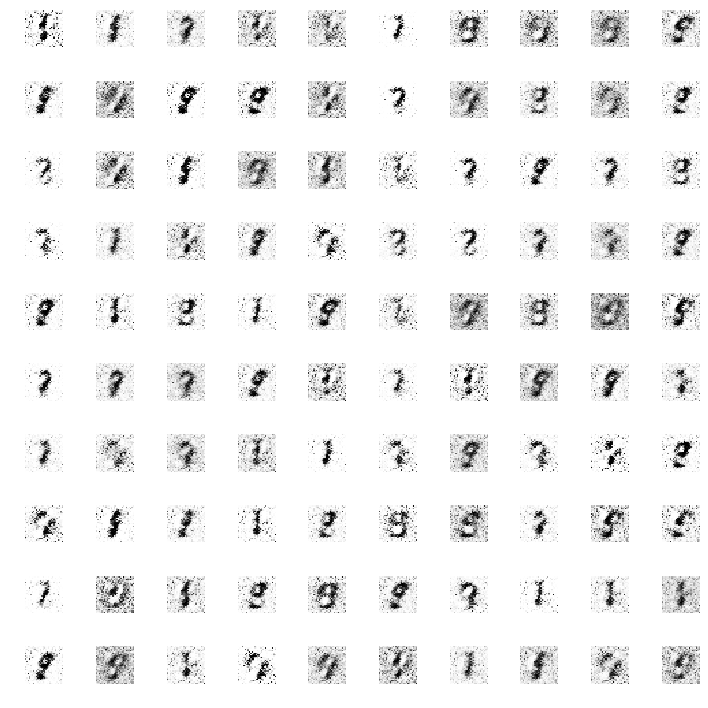

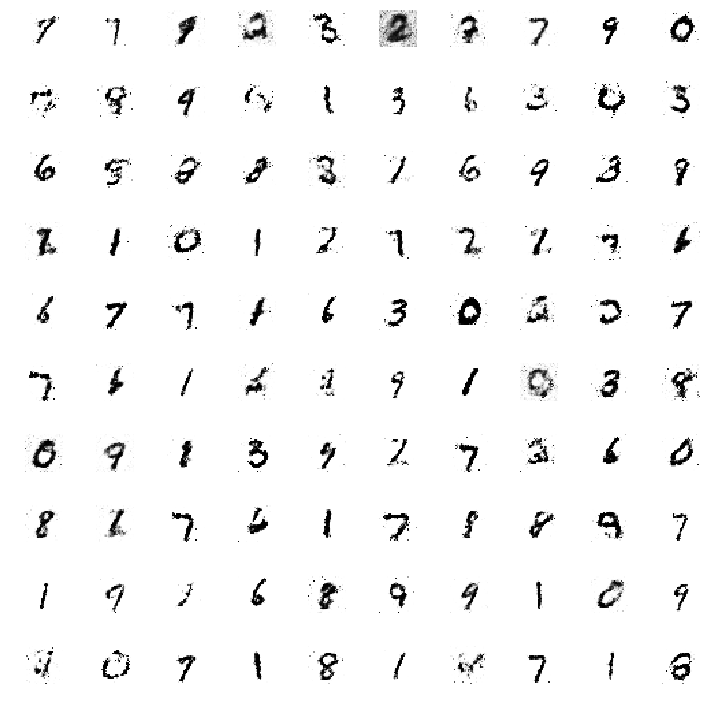

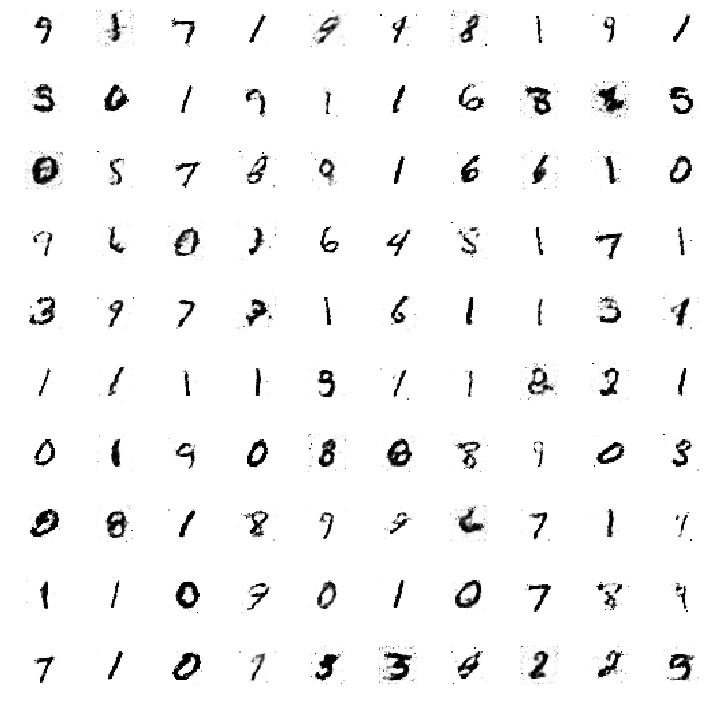

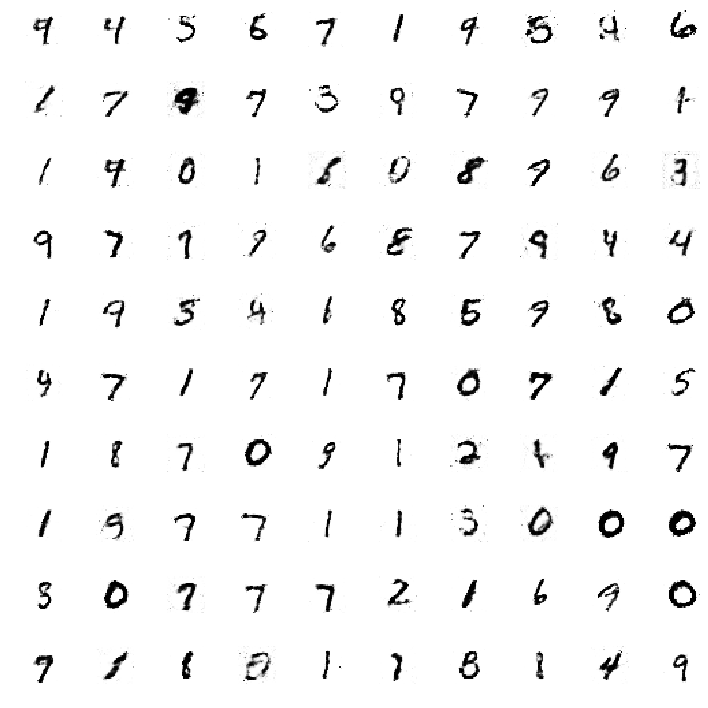

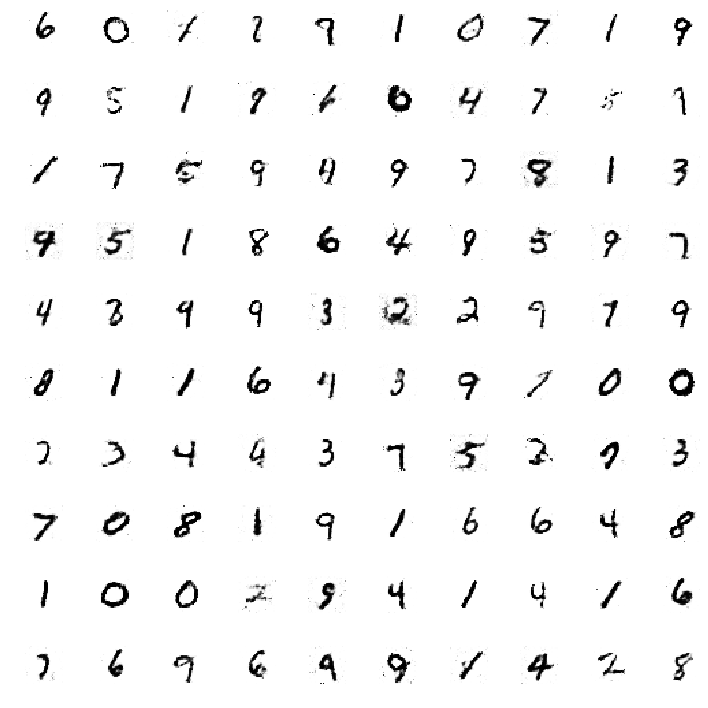

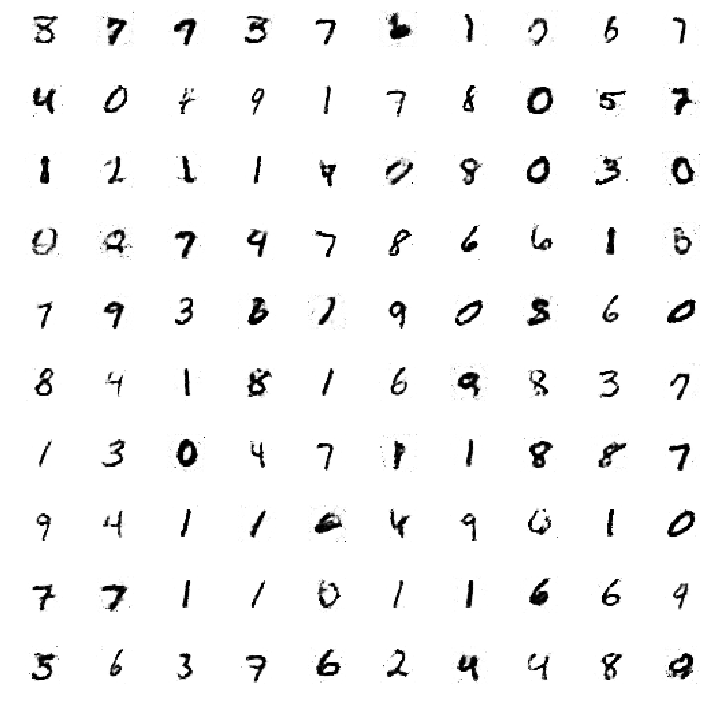

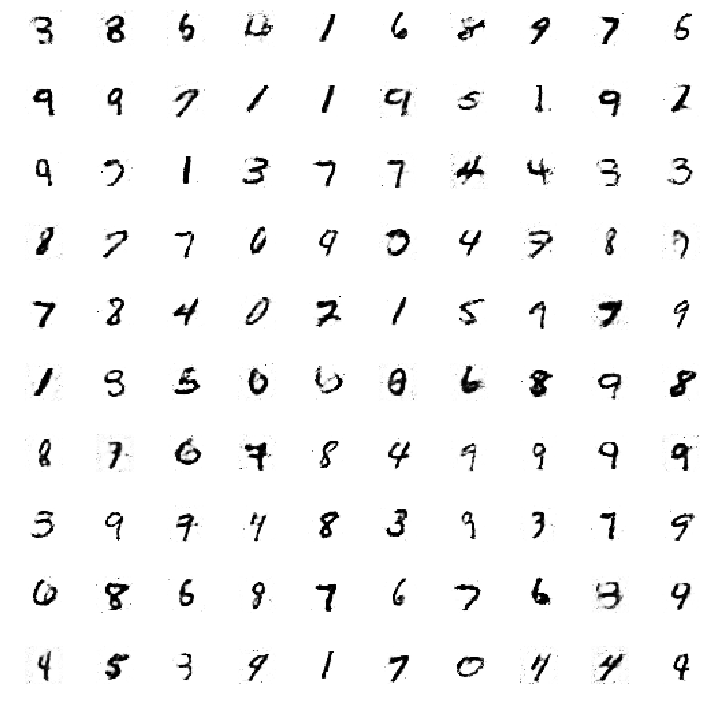

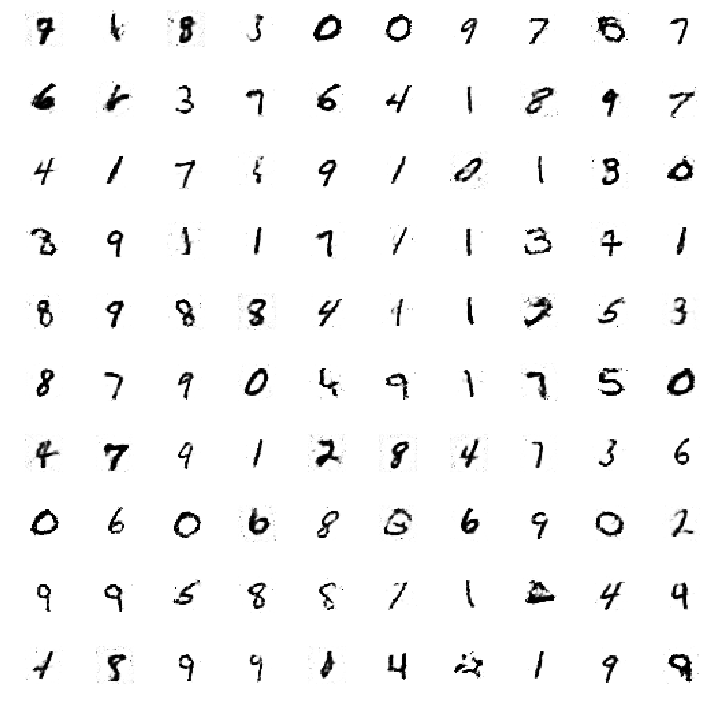

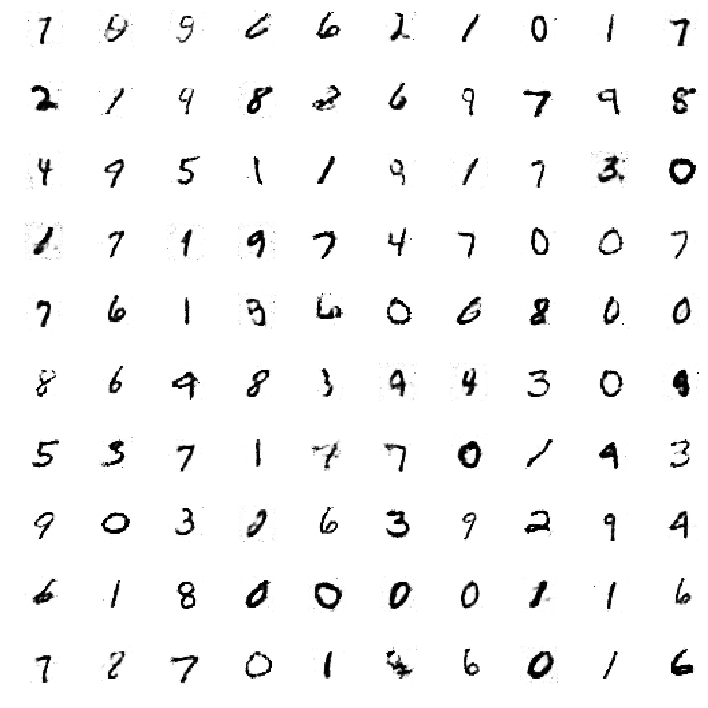

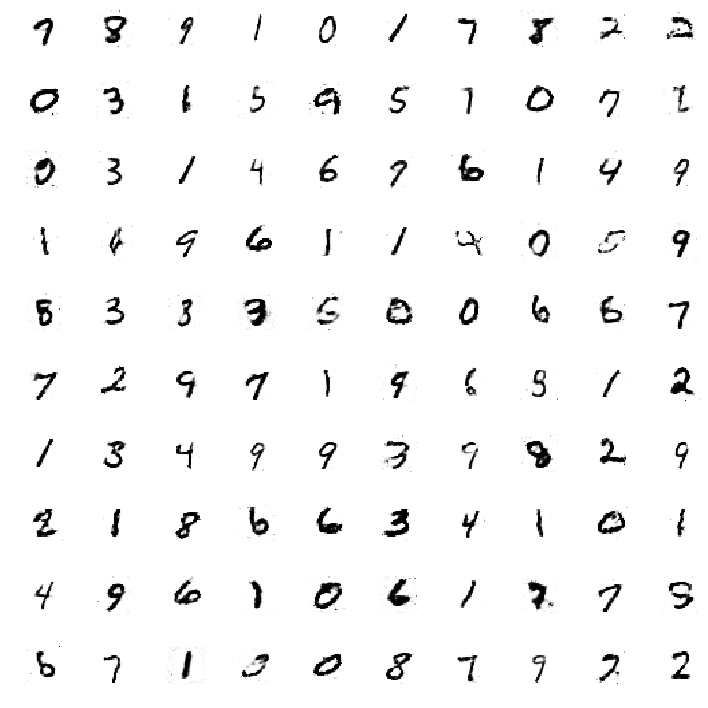

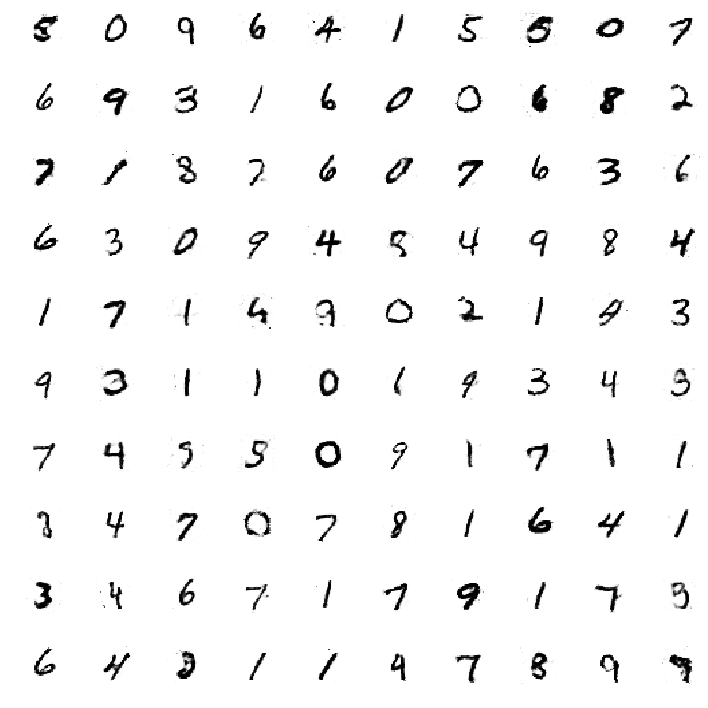

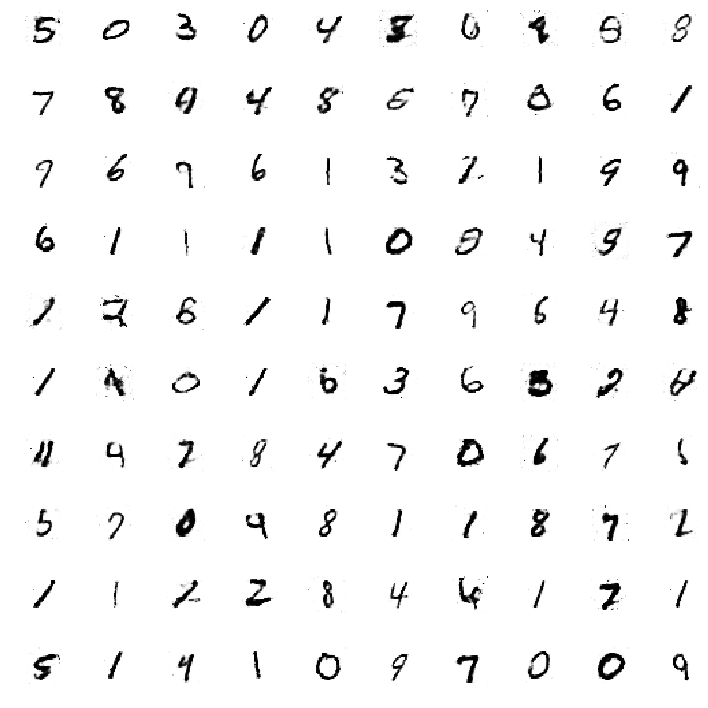

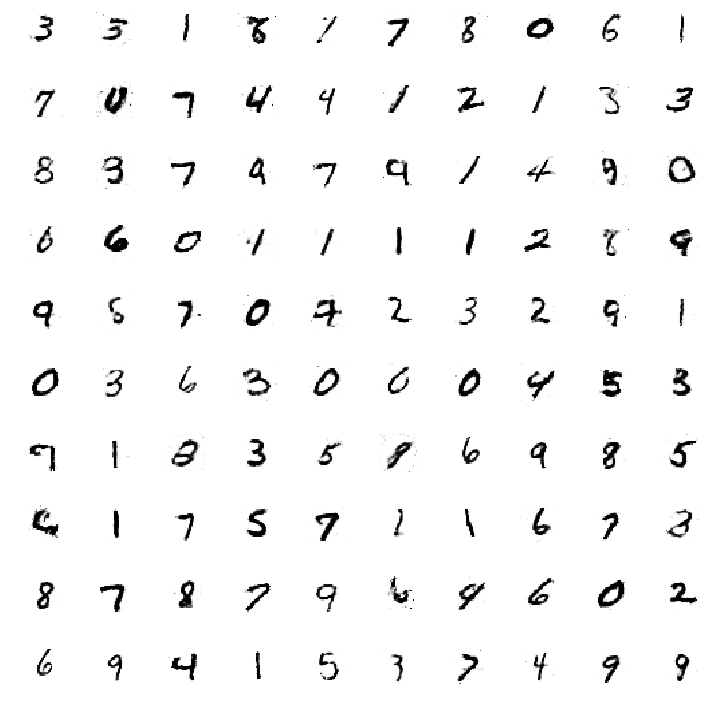

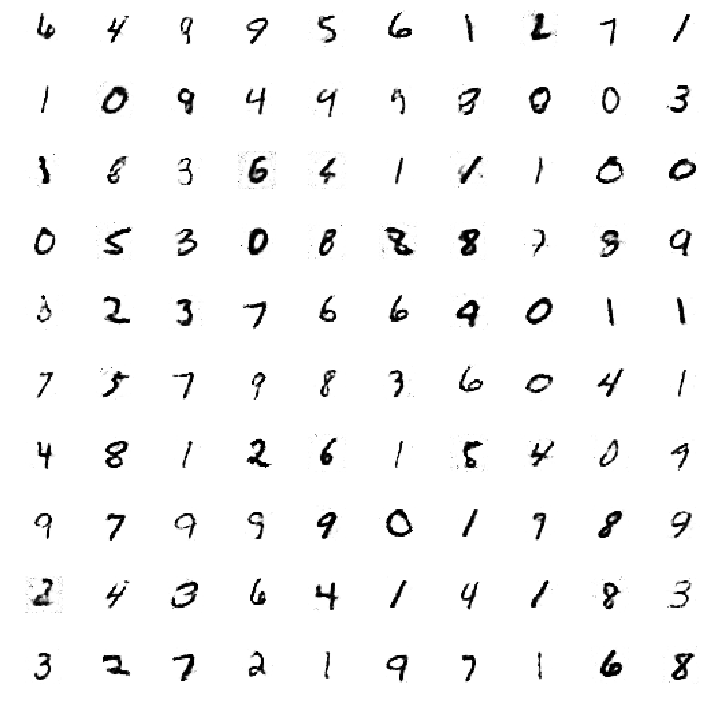

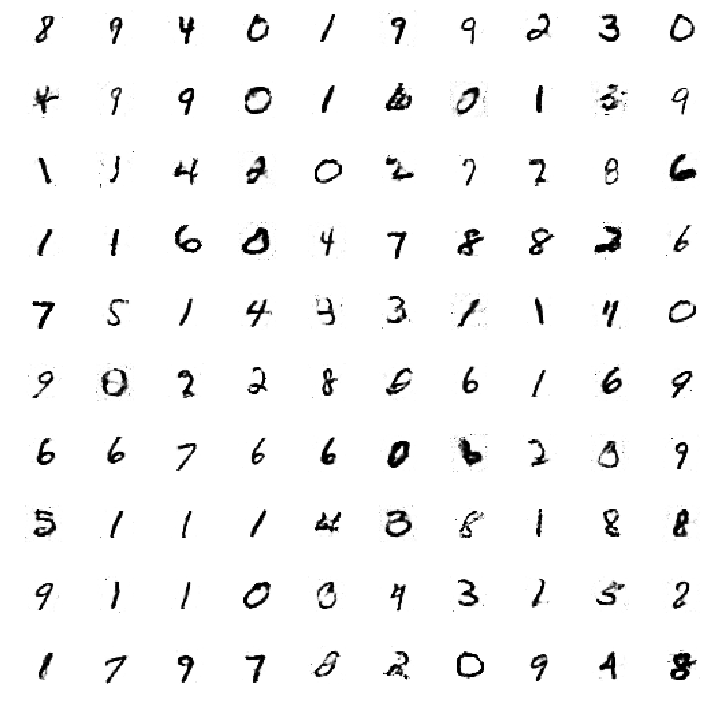

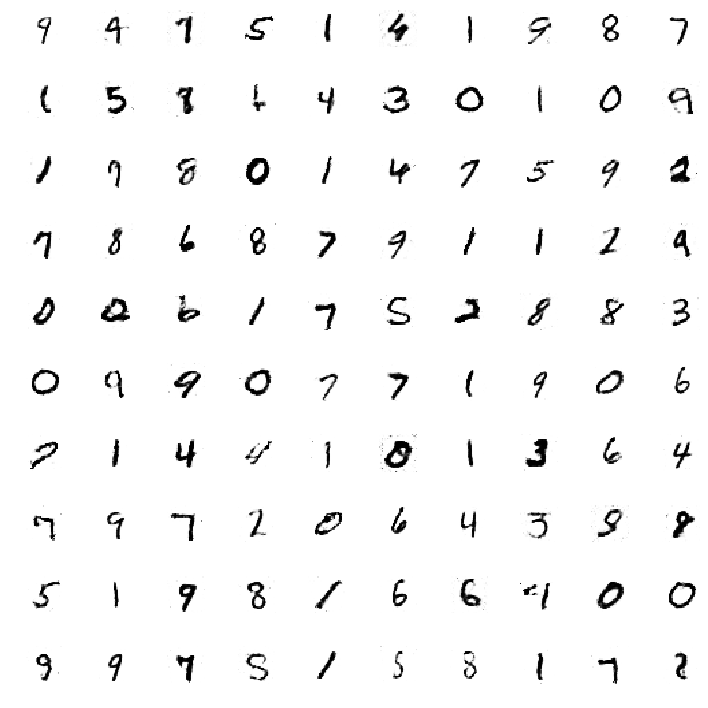

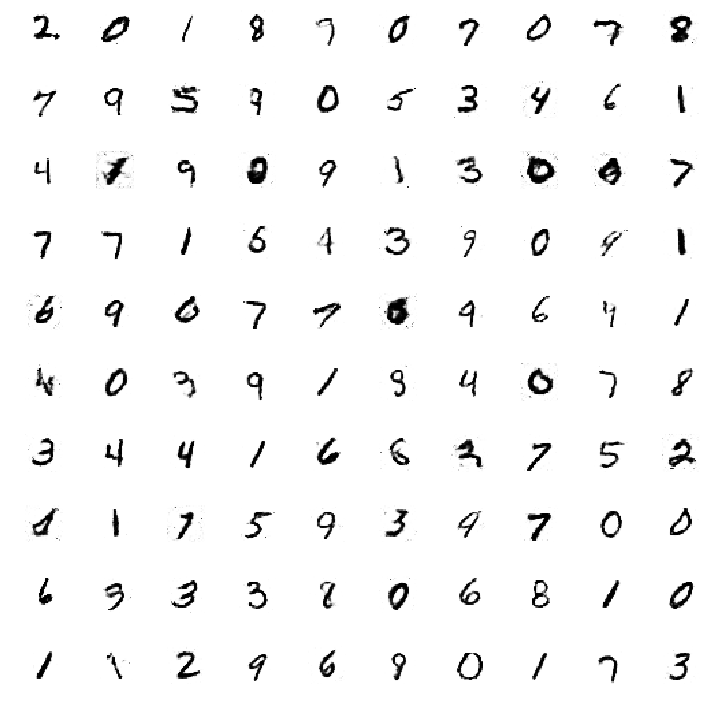

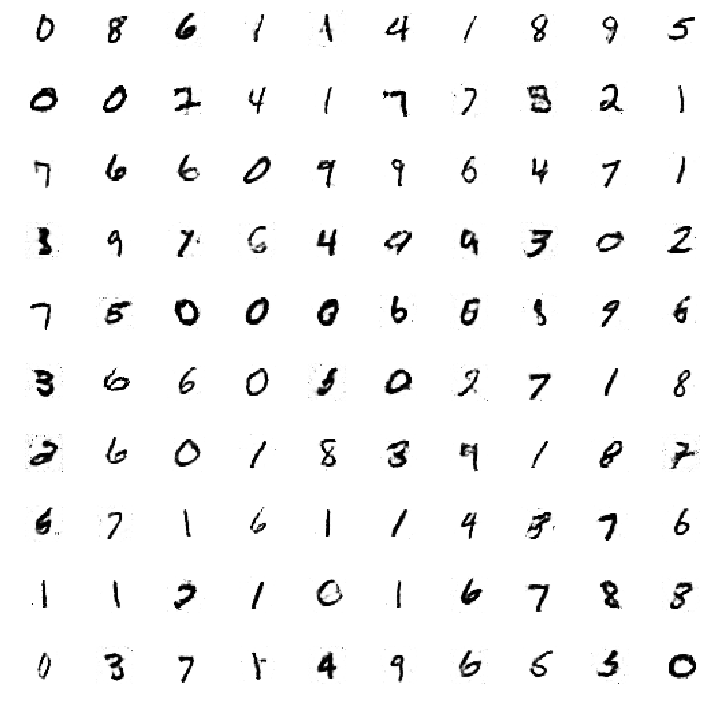

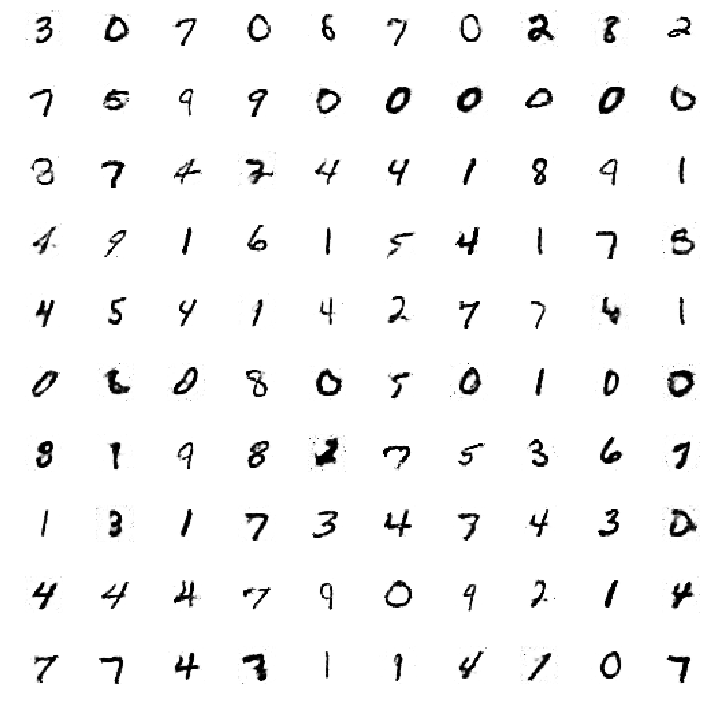

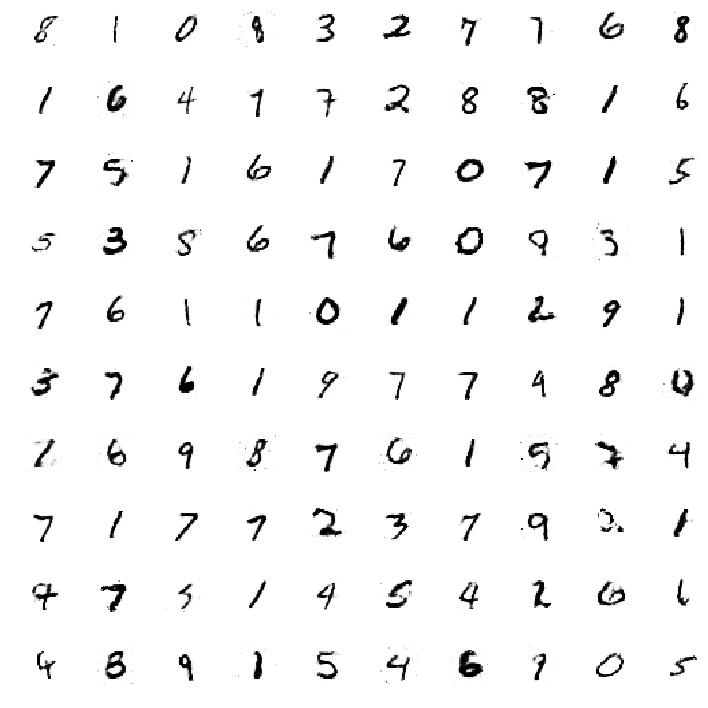

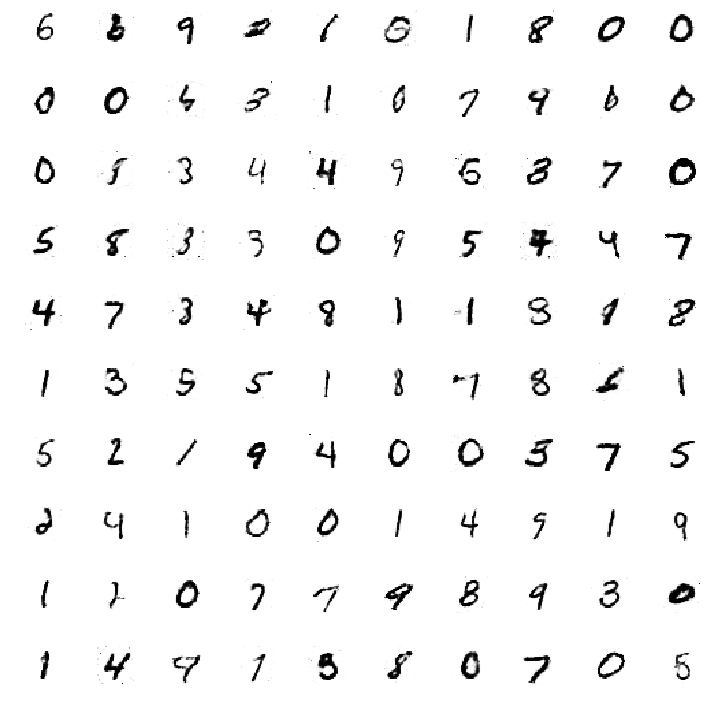

In [8]:
def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] // batch_size

    # Build our GAN netowrk
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

if __name__ == '__main__':
   train(400, 128)